In [1]:
import numpy as np
import healpy as hp
import mm_constrained_realizations as mmcr

In [2]:
import matplotlib.pyplot as plt
import planck_colormap
cm = planck_colormap.colormap()

%matplotlib inline

In [24]:
### set up - params
nside = 64
lmax = 3*nside//2
fwhm = (160/60)*np.pi/180
### importing maps
weights_map = hp.read_map('ISW/input_files/full_weights_map_08_0064.fits',verbose=False)
cl = np.loadtxt('ISW/input_files/Cl_ISW_scalar_PlanckPR2ISWpaper.dat')
isw, stdev, mask = hp.read_map('ISW/input_files/COM_CompMap_ISW_0064_R2.00.fits',
                               hdu=1,field={0,1,2},verbose=False)
### converting units to muK
tcmb = 2.7255 # from Planck params paper
isw[mask == 1] *= 2.7255*10**6
stdev[mask==1] *= 2.7255*10**6
# noise_cov
noise_cov = stdev**2
noise_cov[mask==0] = hp.UNSEEN

/home/marcio/anaconda3/lib/python3.5/site-packages/numpy/core/numeric.py:190: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = empty(shape, dtype, order)


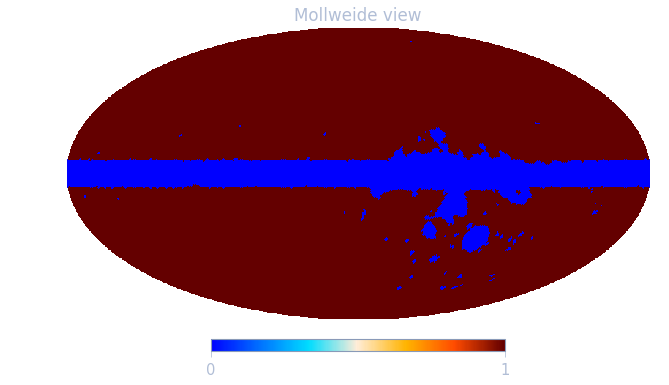

In [31]:
hp.mollview(mask,cmap=cm)

In [5]:
cr = mmcr.ConstrainedRealizations(nside,weights_map,mask=mask)

In [6]:
cr.set_signal_cov(cl,fwhm)
cr.set_noise_cov(noise_cov)

In [21]:
lamb_0 = 1e10
tp = 1e-8
cr.set_cooling_schedule(lamb_0,tp)

In [22]:
xlm = cr.wiener_filter_data(isw)
x = hp.alm2map(xlm,cr.params.nside,cr.params.lmax,verbose=False)

/home/marcio/anaconda3/lib/python3.5/site-packages/numpy/core/numeric.py:190: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = empty(shape, dtype, order)


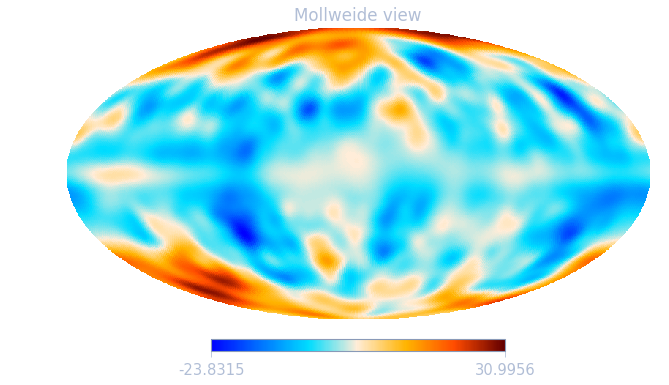

In [23]:
hp.mollview(x,cmap=cm)

In [10]:
#np.save('ISW_WF_PPR2_hdu1',xlm)